# Data Science Unit 4 Sprint Challenge 1 — Tree Ensembles

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 1, 2010 to the present. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [0]:
import pandas as pd

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. You may use any tools and techniques for categorical encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, engineer new features, and use any alternative categorical encoding instead of One-Hot or Ordinal/Label encoding._

### Part 2: Modeling

Fit a Random Forest or Gradient Boosting model with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation to estimate an ROC AUC validation score.

Use your model to predict probabilities for the test set. Get an ROC AUC test score >= 0.60.

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70._


### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:
- Feature Importances
- Permutation Importances
- Partial Dependence Plot

_To earn a score of 3 for this part, make at least two of these visualization types._

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Part 1

#### Initial Investigation

In [3]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15T00:00:00,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20T00:00:00,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05T00:00:00,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29T00:00:00,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [4]:
test.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,114835,7 - ELEVEN,7 - ELEVEN,46907.0,Grocery Store,Risk 2 (Medium),600 S DEARBORN,CHICAGO,IL,60605.0,2011-03-22T00:00:00,Canvass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.874481,-87.629357,"{'longitude': '-87.62935653990546', 'latitude'...",0
1,1575555,TAQUERIA LOS GALLOS INC,TAQUERIA LOS GALLOS,1044860.0,Restaurant,Risk 1 (High),4209-4211 W 26TH ST,CHICAGO,IL,60623.0,2015-09-15T00:00:00,Canvass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.844070,-87.729807,"{'longitude': '-87.72980747367433', 'latitude'...",0
2,671061,TROTTER'S TO GO,TROTTER'S TO GO,1092634.0,Restaurant,Risk 1 (High),1337 W FULLERTON AVE,CHICAGO,IL,60614.0,2012-03-02T00:00:00,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.925128,-87.662041,"{'longitude': '-87.66204067083224', 'latitude'...",0
3,1965844,BIG G'S PIZZA,BIG G'S PIZZA,2334691.0,Restaurant,Risk 1 (High),1132 W TAYLOR ST,CHICAGO,IL,60607.0,2016-10-04T00:00:00,Canvass Re-Inspection,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.869546,-87.655501,"{'longitude': '-87.65550098867566', 'latitude'...",1
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,3491970.0,School,Risk 2 (Medium),1021 E 83RD,CHICAGO,IL,60619.0,2016-04-08T00:00:00,Canvass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.743933,-87.599291,"{'longitude': '-87.59929083361996', 'latitude'...",1


#### Naive Majority Class Baseline

In [5]:
train['Fail'].value_counts(normalize=True, dropna=False)

0    0.74139
1    0.25861
Name: Fail, dtype: float64

#### Cleanup

*Columns to drop:*

**Inspection ID**: seems meaningless

**Location, Address, City, State, Zip**: Redundant with Latitude and Longitude


*Columns considered dropping*:

**DBA name, AKA name**. Possibly redundant, high cardinality

Columns with high cardinality

Columns to change:

**Risk**: High, Medium, Low

In [6]:
train.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Violations', 'Latitude', 'Longitude', 'Location',
       'Fail'],
      dtype='object')

In [7]:
train.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Fail                 int64
dtype: object

In [8]:
train.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

**Cardinality Check**

In [9]:
train.nunique().sort_values(ascending=False)

Inspection ID      51916
Violations         42164
License #          21421
DBA Name           17049
AKA Name           16350
Address            13954
Longitude          13410
Latitude           13410
Location           13410
Inspection Date     2257
Facility Type        329
Zip                   86
Inspection Type       51
City                  39
Risk                   3
Fail                   2
State                  1
dtype: int64

In [10]:
train['Risk'].unique()

array(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)', nan],
      dtype=object)

In [0]:
def cleanup(X):
    '''Cleans up the feature set for further use.'''
#     import datetime as dt

    X = X.copy()
    
    y = X['Fail']
    
    drop_cols = ['Inspection ID','DBA Name','AKA Name','Violations', 'Address',
                'City','State','Zip', 'Location', 'Fail']
    
    for col in drop_cols:
        X = X.drop(col, axis='columns')
   
    
    X['Risk'].replace(['Risk 1 (High)', 'Risk 3 (Low)', 'Risk 2 (Medium)'],
                      ['High','Low', 'Medium'],
                      inplace=True)
    
    X['Inspection Date'] = pd.to_datetime(X['Inspection Date'])
    
    
    coordinates = ['Latitude', 'Longitude']
    
    for col in coordinates:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].mean())
    
    X['License #'] = X['License #'].fillna(0)
    
    cat_cols = ['Facility Type', 'Risk', 'Inspection Type']
    
    for col in cat_cols:
        X[col] = X[col].fillna('None')
    
    
    return X, y



In [12]:
X_train, y_train = cleanup(train)
X_test, y_test = cleanup(test)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((51916, 7), (51916,), (17306, 7), (17306,))

In [13]:
X_train.head()

,License #,Facility Type,Risk,Inspection Date,Inspection Type,Latitude,Longitude
0,2354911.0,Restaurant,High,2017-09-15,Canvass,41.938007,-87.644755
1,1044901.0,Grocery Store,Low,2011-10-20,Complaint Re-Inspection,41.772402,-87.683603
2,47405.0,Restaurant,High,2016-04-05,Canvass Re-Inspection,41.758779,-87.575054
3,6414.0,Restaurant,Medium,2016-04-29,Canvass,41.812181,-87.707125
4,24571.0,School,High,2011-01-10,Canvass,41.879568,-87.676663


In [14]:
X_train.isnull().sum()

License #          0
Facility Type      0
Risk               0
Inspection Date    0
Inspection Type    0
Latitude           0
Longitude          0
dtype: int64

In [15]:
X_train.nunique().sort_values(ascending=False)

License #          21421
Longitude          13411
Latitude           13411
Inspection Date     2257
Facility Type        330
Inspection Type       52
Risk                   4
dtype: int64

#### Feature Engineering

In [0]:
def feature_engineering(X):
    '''Creates new features from the feature sets'''
    import datetime as dt
    X = X.copy()
    X['Inspection Year'] = X['Inspection Date'].dt.year
    X['Inspection Month'] = X['Inspection Date'].dt.month
    X['Inspection Day'] = X['Inspection Date'].dt.day
    X = X.drop('Inspection Date', axis='columns')
    
    return X

In [0]:
X_train = feature_engineering(X_train)
X_test = feature_engineering(X_test)

In [18]:
X_train.dtypes

License #           float64
Facility Type        object
Risk                 object
Inspection Type      object
Latitude            float64
Longitude           float64
Inspection Year       int64
Inspection Month      int64
Inspection Day        int64
dtype: object

In [19]:
X_train.head()

,License #,Facility Type,Risk,Inspection Type,Latitude,Longitude,Inspection Year,Inspection Month,Inspection Day
0,2354911.0,Restaurant,High,Canvass,41.938007,-87.644755,2017,9,15
1,1044901.0,Grocery Store,Low,Complaint Re-Inspection,41.772402,-87.683603,2011,10,20
2,47405.0,Restaurant,High,Canvass Re-Inspection,41.758779,-87.575054,2016,4,5
3,6414.0,Restaurant,Medium,Canvass,41.812181,-87.707125,2016,4,29
4,24571.0,School,High,Canvass,41.879568,-87.676663,2011,1,10


#### Encoding

In [20]:
!pip install category_encoders 
import category_encoders as ce

    100% |████████████████████████████████| 61kB 4.1MB/s 


In [21]:
%%time

# encoder_o = ce.OrdinalEncoder()
# X_train_e = encoder_o.fit_transform(X_train,y_train)
# X_test_e = encoder_o.transform(X_test)

# encoder_oh= ce.one_hot.OneHotEncoder()
# X_train_e = encoder_oh.fit_transform(X_train,y_train)
# X_test_e = encoder_oh.transform(X_test)

encoder_t = ce.TargetEncoder()
X_train = encoder_t.fit_transform(X_train,y_train)
X_test = encoder_t.transform(X_test)

CPU times: user 4.19 s, sys: 29.9 ms, total: 4.22 s
Wall time: 4.22 s




---



## Part 2

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

In [28]:
%%time

rf = RandomForestClassifier(
        n_estimators=100, 
        class_weight='balanced', 
        criterion = "entropy", 
        bootstrap = True, 
        max_features= 5, 
        min_samples_leaf=2, 
        min_samples_split= 2,
        max_depth = None,
        n_jobs=-1)

xgb = XGBClassifier(n_estimators = 200,
                    booster='dart',
                    n_jobs=-1)

model = rf

scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)

print(scores)
print(f"Score range: {round(min(scores),5)}-{round(max(scores),5)}\n")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[0.72536535 0.72105689 0.73818363 0.73218181 0.73427844]
Score range: 0.72106-0.73818

CPU times: user 76.9 ms, sys: 36.2 ms, total: 113 ms
Wall time: 1min 35s


In [29]:
%%time

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

CPU times: user 45.6 s, sys: 124 ms, total: 45.8 s
Wall time: 23.1 s


In [32]:
from sklearn.metrics import roc_auc_score

print(f'The ROC-AUC score is {100*round(roc_auc_score(y_test, y_pred),5)}%.')

The ROC-AUC score is 61.794000000000004%.


Area under the Receiver Operating Characteristic curve: 0.6179437457031657


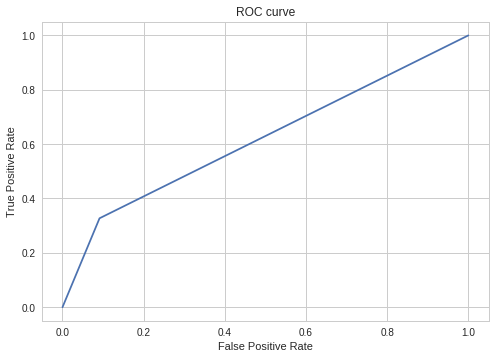

In [33]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred))



---



## Part 3

**Permutation Importance**

In [34]:
!pip install eli5

    100% |████████████████████████████████| 102kB 4.5MB/s 


In [35]:
%%time
import eli5
from eli5.sklearn import PermutationImportance


model.fit(X_train, y_train)
permuter = PermutationImportance(model, scoring='roc_auc', n_iter=1, cv='prefit')
permuter.fit(X_train, y_train)

CPU times: user 1min 3s, sys: 368 ms, total: 1min 4s
Wall time: 33.8 s


In [36]:
eli5.show_weights(permuter, top=None, feature_names=X_train.columns.tolist())

Weight,Feature
0.2768 ± 0.0000,Inspection Type
0.1385 ± 0.0000,Latitude
0.1139 ± 0.0000,Longitude
0.1120 ± 0.0000,License #
0.1063 ± 0.0000,Inspection Year
0.0318 ± 0.0000,Facility Type
0.0301 ± 0.0000,Inspection Month
0.0279 ± 0.0000,Inspection Day
0.0033 ± 0.0000,Risk


**All the remaining features have positive weight which means we shouldn't necessarily drop any of them. **

**Partial Dependence Plot**

In [37]:
!pip install pdpbox

    100% |████████████████████████████████| 57.7MB 428kB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


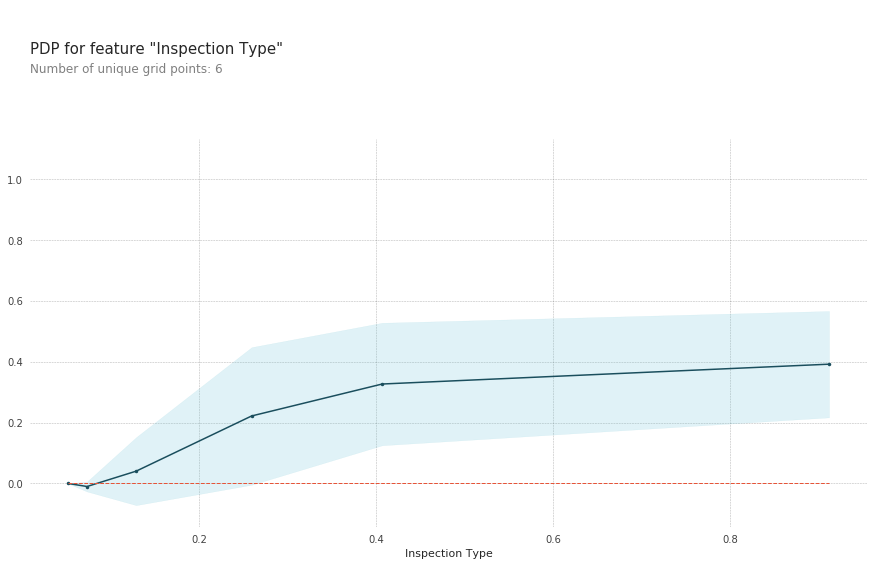

In [38]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature='Inspection Type'
pdp_isolated = pdp_isolate(model=model, dataset=X_train, model_features=X_train.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

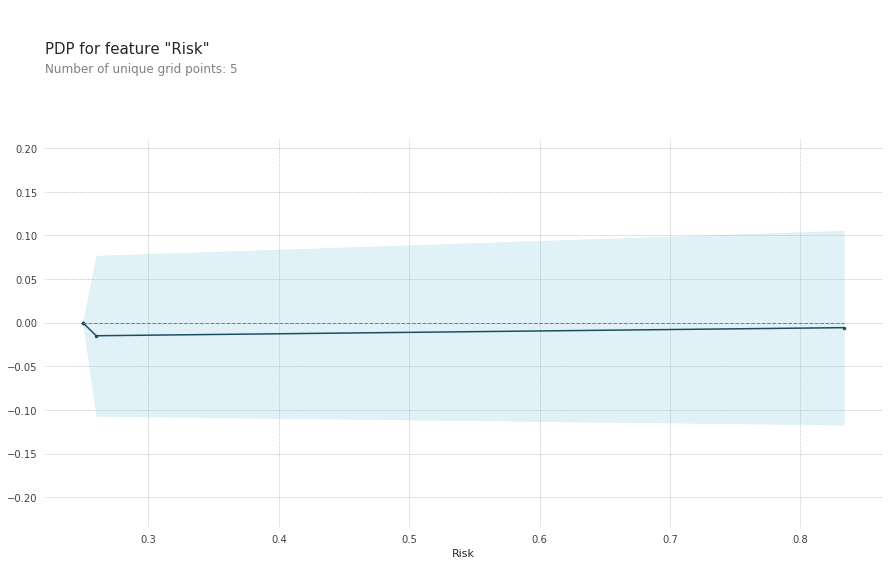

In [39]:
feature='Risk'
pdp_isolated = pdp_isolate(model=model, dataset=X_train, model_features=X_train.columns, feature=feature)
pdp_plot(pdp_isolated, feature);